In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
df = pd.read_csv('conversion_data.csv')
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [12]:
df.loc[df['age']>100,:]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [13]:
df.loc[df['age']<100].describe()

,age,new_user,total_pages_visited,converted
count,316198.000000,316198.000000,316198.000000,316198.000000
mean,30.569311,0.685469,4.872918,0.032252
std,8.268958,0.464329,3.341053,0.176669
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,79.000000,1.000000,29.000000,1.000000


In [14]:
df = df.loc[df['age']<100]

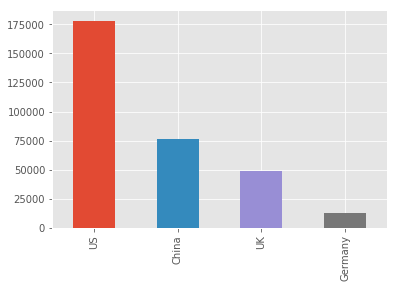

In [16]:
country_list = df['country'].value_counts()
country_list.plot(kind = 'bar')

In [ ]:
convert_by_Country_dist = df.groupby('country')['converted'].mean()
convert_by_Country_dist
convert_by_Country_dist.plot(kind= 'bar')

## clean the data 
from above plots, we can see two problems:
1. there are lotd of users in China, but the conversion rate is low
2. conversion rate in Gernmay is very high, but the user there are not much.

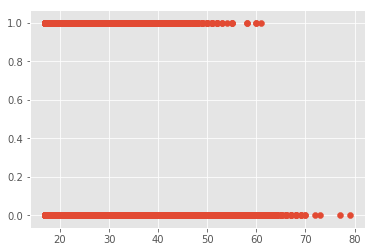

In [20]:
plt.scatter(df['age'], df['converted'])

From the above plot, we can see there is no conversion from user who are older than 60.

# Data Preprocessing 

In [21]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [24]:
X= df[['country','age','new_user','source','total_pages_visited']]

In [26]:
X= pd.get_dummies(X)
X.head()

,age,new_user,total_pages_visited,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,1,0,1,0,0
1,23,1,5,0,0,0,1,0,0,1
2,28,1,4,0,0,0,1,0,0,1
3,39,1,5,1,0,0,0,0,0,1
4,30,1,6,0,0,0,1,0,0,1


In [30]:
y = df['converted']
y.mean()
#df.head()

0.03225194340255157

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X,y)

In [32]:
y_train.mean(), y_test.mean()

(0.032270986894260126, 0.03219481340923466)

# Classify via Random Forest

In [43]:
lrv_fit = RandomForestClassifier(n_estimators = 1000, criterion = 'gini', max_depth = 300, min_samples_split= 3, min_samples_leaf =1)

In [45]:
lrv_fit.fit(x_train, y_train)
y_predict = lrv_fit.predict(x_train)

In [46]:
print('\nRandom Forest Classfier\n\n', pd.crosstab(y_train, y_predict,rownames=['Actuall'], colnames = ['Predicted'])
     )


Random Forest Classfier

 Predicted       0     1
Actuall                
0          228761   734
1            2024  5629


In [47]:
classification_report(y_train, y_predict)

'             precision    recall  f1-score   support\n\n          0       0.99      1.00      0.99    229495\n          1       0.88      0.74      0.80      7653\n\navg / total       0.99      0.99      0.99    237148\n'

In [50]:
importance = lrv_fit.feature_importances_

In [51]:
#indices = np.argsort()
#importance.sort_values()

AttributeError: 'numpy.ndarray' object has no attribute 'sort_values'